In [1]:
import numpy as np # Trabalhar com vetores
from sklearn.covariance import EllipticEnvelope #Detectar outliers
from sklearn.datasets import make_blobs #Cria base de dados

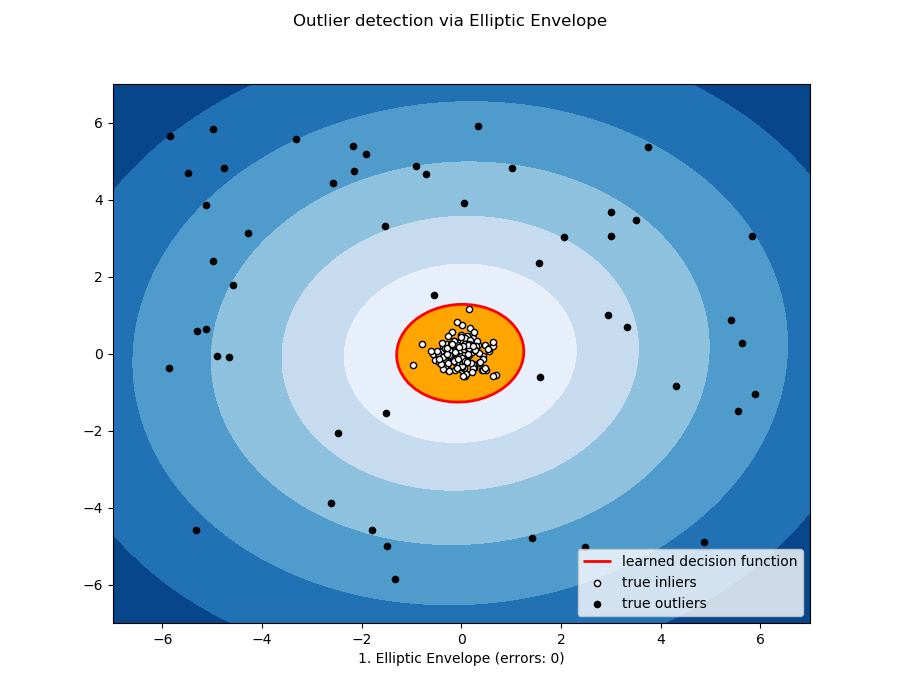

In [2]:
# Create simulated data
X, _ = make_blobs(n_samples = 10,
                  n_features = 2,
                  centers = 1,
                  random_state = 1)

In [3]:
X

array([[-1.83198811,  3.52863145],
       [-2.76017908,  5.55121358],
       [-1.61734616,  4.98930508],
       [-0.52579046,  3.3065986 ],
       [ 0.08525186,  3.64528297],
       [-0.79415228,  2.10495117],
       [-1.34052081,  4.15711949],
       [-1.98197711,  4.02243551],
       [-2.18773166,  3.33352125],
       [-0.19745197,  2.34634916]])

In [4]:
X[0,0] = 10000
X[0,1] = 10000

print(X)

[[ 1.00000000e+04  1.00000000e+04]
 [-2.76017908e+00  5.55121358e+00]
 [-1.61734616e+00  4.98930508e+00]
 [-5.25790464e-01  3.30659860e+00]
 [ 8.52518583e-02  3.64528297e+00]
 [-7.94152277e-01  2.10495117e+00]
 [-1.34052081e+00  4.15711949e+00]
 [-1.98197711e+00  4.02243551e+00]
 [-2.18773166e+00  3.33352125e+00]
 [-1.97451969e-01  2.34634916e+00]]


In [5]:
import pandas as pd
pd.DataFrame(X)

,0,1
0,10000.000000,10000.000000
1,-2.760179,5.551214
2,-1.617346,4.989305
3,-0.525790,3.306599
4,0.085252,3.645283
5,-0.794152,2.104951
6,-1.340521,4.157119
7,-1.981977,4.022436
8,-2.187732,3.333521
9,-0.197452,2.346349


### EllipticEnvelope
- O Elliptic Evelope cria uma elipse e aquilo que tiver fora dela, é um outlier

In [6]:
# Create detector
# Instancia o EllipticEnvelope com 10% de contaminação
# Vai procurar 10% dos outliers
outlier_detector = EllipticEnvelope(contamination=.1) # Vai procurar 10% dos outliers

# Fit detector
outlier_detector.fit(X)

# Predict outliers
outlier_detector.predict(X)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [7]:
df = pd.DataFrame(X)

In [8]:
# Criando coluna chamada outlier e jogar o valor pretido do outlier(-1)
df['outlier'] = outlier_detector.predict(X)

In [9]:
df

,0,1,outlier
0,10000.000000,10000.000000,-1
1,-2.760179,5.551214,1
2,-1.617346,4.989305,1
3,-0.525790,3.306599,1
4,0.085252,3.645283,1
5,-0.794152,2.104951,1
6,-1.340521,4.157119,1
7,-1.981977,4.022436,1
8,-2.187732,3.333521,1
9,-0.197452,2.346349,1


In [10]:
df=df[df['outlier']==1]

In [11]:
df

,0,1,outlier
1,-2.760179,5.551214,1
2,-1.617346,4.989305,1
3,-0.525790,3.306599,1
4,0.085252,3.645283,1
5,-0.794152,2.104951,1
6,-1.340521,4.157119,1
7,-1.981977,4.022436,1
8,-2.187732,3.333521,1
9,-0.197452,2.346349,1


In [12]:
df = df.drop(['outlier'],axis=1)

In [13]:
df

,0,1
1,-2.760179,5.551214
2,-1.617346,4.989305
3,-0.525790,3.306599
4,0.085252,3.645283
5,-0.794152,2.104951
6,-1.340521,4.157119
7,-1.981977,4.022436
8,-2.187732,3.333521
9,-0.197452,2.346349
